<h3>K-Means Clustering </h3>
<h4>Concept</h4>
<p>K-Means clustering is a method of grouping data into clusters (groups) based on their similarities.</p>
<p>I will be doing 2 examples here first one is regarding clustering data on the basis of subject and next one will be IRIS dataset</p>


<h5>1. Working on our custom data</h5>

In [2]:
# Importing Libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import random
import seaborn as sns

students=[chr(i+64) for i in range(1,100)]
math_marks=[random.randrange(1,100) for i in range(len(students))]
science_marks=[random.randrange(1,100) for i in range(len(students))]

print(len(students), len(math_marks), len(science_marks))
data_frame=pd.DataFrame({
    'Name': students,
    'Maths':math_marks,
    'Science':science_marks
})

data_frame

99 99 99


,Name,Maths,Science
0,A,32,84
1,B,49,47
2,C,75,89
3,D,86,23
4,E,11,48
...,...,...,...
94,,33,53
95,,66,49
96,¡,60,10
97,¢,95,10


Text(0, 0.5, 'Science')

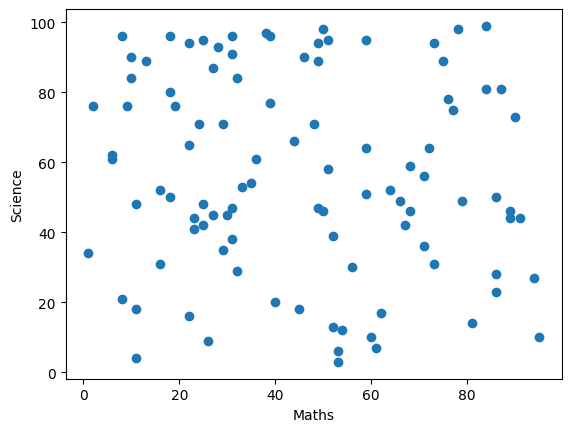

In [3]:
plt.scatter(data_frame['Maths'], data_frame['Science'])
plt.xlabel('Maths')
plt.ylabel('Science')

In [10]:
kmeans=KMeans(n_clusters=4, random_state=42)

# Fitting the model
kmeans.fit(data_frame[['Maths', 'Science']])

# Add the cluster labels to the Dataframe
data_frame['Cluster']= kmeans.labels_

data_frame

,Name,Maths,Science,Cluster
0,A,32,84,0
1,B,49,47,1
2,C,75,89,3
3,D,86,23,1
4,E,11,48,2
...,...,...,...,...
94,,33,53,2
95,,66,49,1
96,¡,60,10,1
97,¢,95,10,1


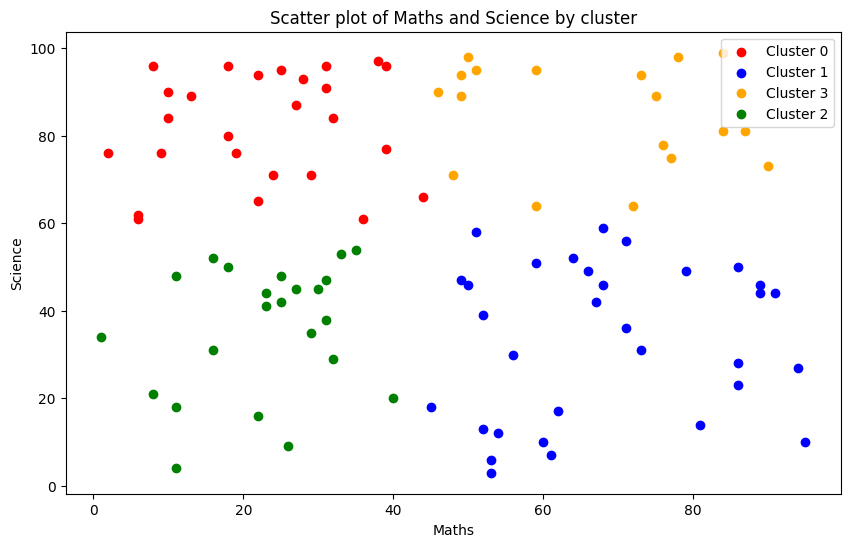

In [11]:
# Define colors for each cluster
colors={0:'red',1:'blue',2:'green',3:'orange'}

# Create scatter plot
plt.figure(figsize=(10,6))
for cluster in data_frame['Cluster'].unique():
    subset=data_frame[data_frame['Cluster']==cluster]
    plt.scatter(subset['Maths'], subset['Science'],color=colors[cluster],label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Maths')
plt.ylabel('Science')
plt.title('Scatter plot of Maths and Science by cluster')
plt.legend()
plt.show()

<h4>2. Working on IRIS Dataset</h4>

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


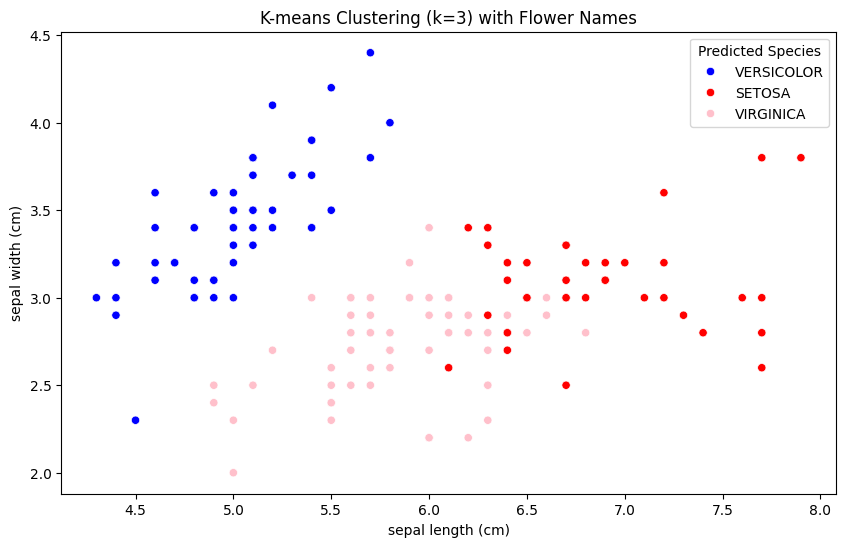

In [1]:
# Importing Libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import random
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset
iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.columns)

# Initialize KMeans with 3 clusters
kmeans=KMeans(n_clusters=3,random_state=42)

# Fit the model
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['Cluster']=kmeans.labels_

# Map cluster labels to actual species names
species_map={0:'SETOSA', 1:'VERSICOLOR', 2:'VIRGINICA'}
df['Predicted Species']=df['Cluster'].map(species_map)

# Defining a custom palette with unique colors for each species
custom_palette={'SETOSA':'red', 'VERSICOLOR':'blue', 'VIRGINICA':'pink'}

# Visualizing the clusters with actual aspects names and distinct colors
plt.figure(figsize=(10,6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Predicted Species', data=df, palette=custom_palette)
plt.title('K-means Clustering (k=3) with Flower Names')
plt.show()



<h3>PCA</h3>

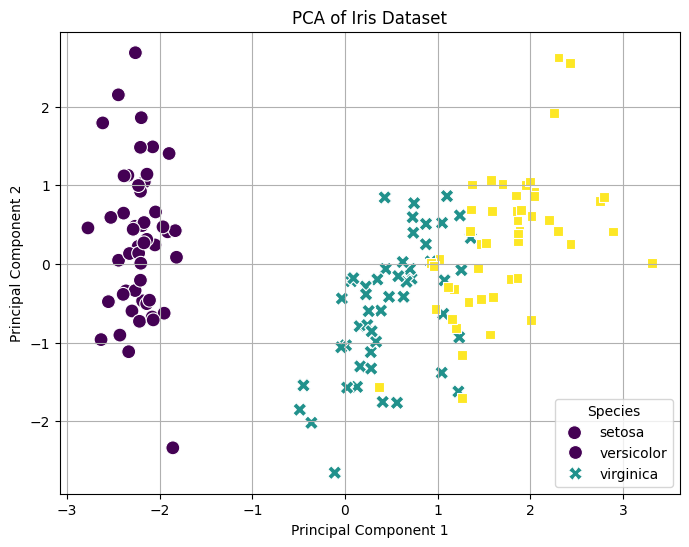

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target labels
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", style=y, s=100)
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(target_names, title="Species")
plt.grid(True)
plt.show()
